In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#csv files
population_df = pd.read_csv("Illinois_Population_Pivot.csv")
census_areas = pd.read_csv("community_area_to_census.csv")

In [3]:
population_df.head()

,Name,2012,2013,2014,2015
0,"Adams, Pike, Brown, Schuyler & Mason Counties ...",112582,112391,111998,111521
1,"Cass, Morgan, Scott, Greene, Macoupin, Jersey ...",143980,143394,142662,141551
2,Champaign County--Champaign & Urbana Cities PU...,200931,202428,204214,205766
3,"Chicago City (Central)--Near North Side, Loop ...",127124,132871,136968,141554
4,"Chicago City (North)--Edgewater, Uptown & Roge...",167887,167162,164391,164412


In [4]:
census_areas.head()

,Unnamed: 0,Community,Community Number,Public Use Area
0,0,Rogers Park,1.0,"Chicago City (North)--Edgewater, Uptown & Roge..."
1,1,West Ridge,2.0,"Chicago City (North)--West Ridge, Lincoln Squa..."
2,2,Uptown,3.0,"Chicago City (North)--Edgewater, Uptown & Roge..."
3,3,Lincoln Square,4.0,"Chicago City (North)--West Ridge, Lincoln Squa..."
4,4,North Center,5.0,"Chicago City (North)--West Ridge, Lincoln Squa..."


In [5]:
#merge population to census areas
census_pop = pd.merge(census_areas, population_df, how='left', left_on="Public Use Area", right_on="Name")

In [6]:
#count values to see if any missing data
census_pop.count()

Unnamed: 0            77
Community             77
Community \nNumber    77
Public Use Area       65
Name                  65
2012                  65
2013                  65
2014                  65
2015                  65
dtype: int64

In [7]:
#drop any values where community area was not found in census data
census_pop_1 = census_pop.dropna(how="any")

In [8]:
#count values new df
census_pop_1.count()

Unnamed: 0            65
Community             65
Community \nNumber    65
Public Use Area       65
Name                  65
2012                  65
2013                  65
2014                  65
2015                  65
dtype: int64

In [9]:
#display head data
census_pop_1.head()

,Unnamed: 0,Community,Community Number,Public Use Area,Name,2012,2013,2014,2015
0,0,Rogers Park,1.0,"Chicago City (North)--Edgewater, Uptown & Roge...","Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
1,1,West Ridge,2.0,"Chicago City (North)--West Ridge, Lincoln Squa...","Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
2,2,Uptown,3.0,"Chicago City (North)--Edgewater, Uptown & Roge...","Chicago City (North)--Edgewater, Uptown & Roge...",167887.0,167162.0,164391.0,164412.0
3,3,Lincoln Square,4.0,"Chicago City (North)--West Ridge, Lincoln Squa...","Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0
4,4,North Center,5.0,"Chicago City (North)--West Ridge, Lincoln Squa...","Chicago City (North)--West Ridge, Lincoln Squa...",145745.0,146506.0,147381.0,147595.0


In [10]:
#remove unwanted columns
census_population = census_pop_1[["Public Use Area","Community","Community \nNumber","2012","2013","2014","2015"]]

In [11]:
#check new dataframe
census_population.head()

,Public Use Area,Community,Community Number,2012,2013,2014,2015
0,"Chicago City (North)--Edgewater, Uptown & Roge...",Rogers Park,1.0,167887.0,167162.0,164391.0,164412.0
1,"Chicago City (North)--West Ridge, Lincoln Squa...",West Ridge,2.0,145745.0,146506.0,147381.0,147595.0
2,"Chicago City (North)--Edgewater, Uptown & Roge...",Uptown,3.0,167887.0,167162.0,164391.0,164412.0
3,"Chicago City (North)--West Ridge, Lincoln Squa...",Lincoln Square,4.0,145745.0,146506.0,147381.0,147595.0
4,"Chicago City (North)--West Ridge, Lincoln Squa...",North Center,5.0,145745.0,146506.0,147381.0,147595.0


In [12]:
#drop multiple values, only need one public use area for this graph
census_population["Public Use Area"].value_counts()
census_population_dropped = census_population.drop_duplicates(["Public Use Area"])

In [13]:
#check dataframe
census_population_dropped.head()
census_population_dropped.reset_index(drop=True)


,Public Use Area,Community,Community Number,2012,2013,2014,2015
0,"Chicago City (North)--Edgewater, Uptown & Roge...",Rogers Park,1.0,167887.0,167162.0,164391.0,164412.0
1,"Chicago City (North)--West Ridge, Lincoln Squa...",West Ridge,2.0,145745.0,146506.0,147381.0,147595.0
2,Chicago City (North)--Lake View & Lincoln Park...,Lake View,6.0,161170.0,162430.0,163919.0,165171.0
3,"Chicago City (Central)--Near North Side, Loop ...",Near North Side,8.0,127124.0,132871.0,136968.0,141554.0
4,"Cook County (North)--Maine, Norwood Park Towns...",Edison Park,9.0,186023.0,186248.0,186363.0,186596.0
5,"Chicago City (Northwest)--Portage Park, Dunnin...",Jefferson Park,11.0,132505.0,133211.0,134455.0,135135.0
6,"Chicago City (Northwest)--Irving Park, Albany ...",Forest Glen,12.0,147691.0,148787.0,145956.0,145478.0
7,"Chicago City (West)--Austin, Belmont Cragin & ...",Montclare,18.0,188448.0,188559.0,191620.0,189826.0
8,"Chicago City (Northwest)--Logan Square, Avonda...",Hermosa,20.0,140396.0,139456.0,138008.0,139759.0
9,"Chicago City (West)--North & South Lawndale, H...",Humboldt Park,23.0,201675.0,198328.0,202175.0,202511.0


In [14]:
#sort population data by size in year 2012
census_population_sorted = census_population_dropped.sort_values(["2012"])

In [49]:
#define chart variables
x=np.arange(0,len(census_population_sorted["Public Use Area"]))
y1=census_population_sorted["2012"]
y2=census_population_sorted["2013"]
y3=census_population_sorted["2014"]
y4=census_population_sorted["2015"]
legend = ["2012","2013","2014","2015"]
#colors = ['darkolivegreen','olivedrab',"darkolivegreen",'cornflowerblue']

In [25]:
#labels


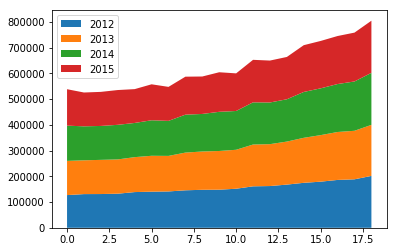

<Figure size 2160x4320 with 0 Axes>

In [50]:
#graph of population over time
fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3,y4, labels=legend)
ax.legend(loc="upper left")
fig = plt.figure(figsize = (30,60))
#ax.xaxis.set_ticklabels(labels)

plt.show()